# Devoir de Deep learning sur Boston House

 # NANKENG DJIMY DAMESSE HN L3- DS MATRICULE 20P047

# Importation de toutes les Bibliotheques et du dataset

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
boston = load_boston()

# Convertion des données en dataframe

In [105]:
data = pd.DataFrame(boston.data)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# Visualisation des 4 premieres lignes

In [106]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Creation de la variable feature

In [107]:
data.columns = boston.feature_names

# Creation de la variable Target qui sera PRICE

In [108]:
data['PRICE'] = boston.target

# Visualisation de la variable PRICE

In [109]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Dimension du Dataset

In [110]:
print(data.shape)

(506, 14)


# Vérification si il ya les variables Nulles

In [111]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# Statistique sur les variables

In [112]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Types de données

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Visualisation de la distribution de la variable

C:\Users\DAMESSE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

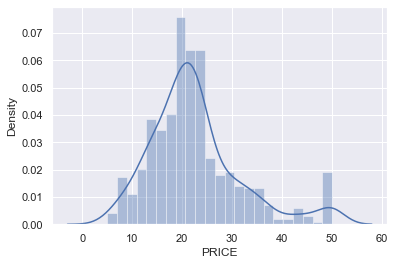

In [114]:
import seaborn as sns
sns.distplot(data.PRICE)

# Deuxieme forme de distribution

C:\Users\DAMESSE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRICE'>

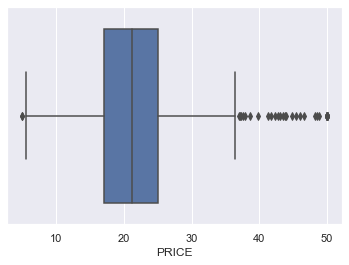

In [115]:
sns.boxplot(data.PRICE)

# Correlation entre les données

In [116]:
 correlation = data.corr()
correlation.loc['PRICE']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

# Visualisation de la Correlation

<AxesSubplot:>

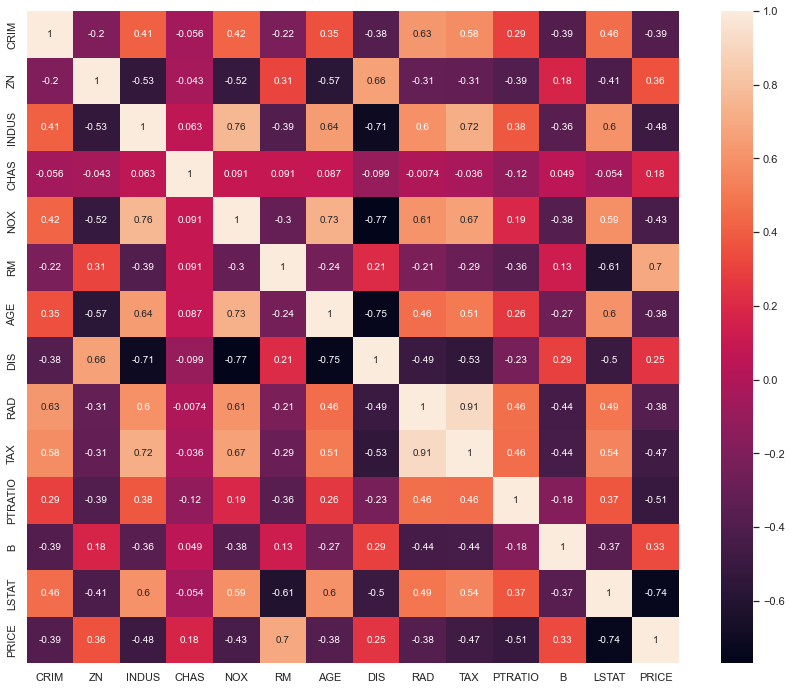

In [117]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

# Visualisation des Scatters 

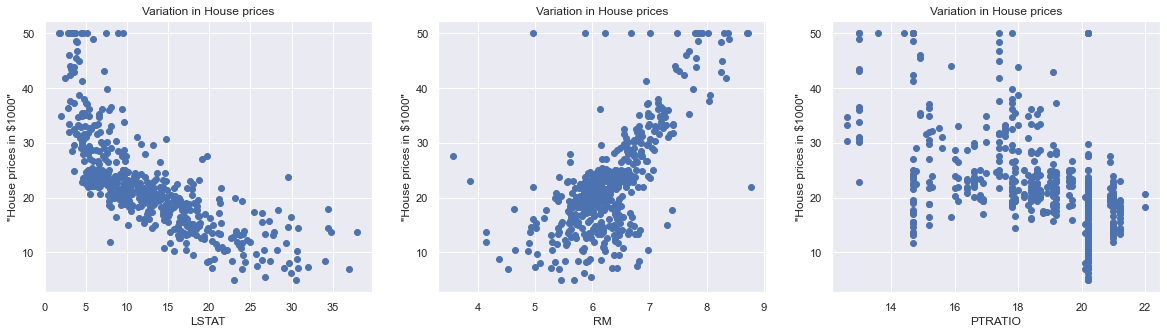

In [118]:
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = data.PRICE
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [119]:
X = data.iloc[:,:-1]
y= data.PRICE

# Fractionnement du dataset en train pour entrainer le modèle 

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

# Regression Linéaire

In [121]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [122]:
regressor.fit(X_train,y_train)

LinearRegression()

# Prédiction avec le Modèle

In [123]:
y_pred = regressor.predict(X_test)

# Prédiction RMSE du Test set

In [124]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

5.041784121402051


In [125]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7263451459702509


# Mise à l'echelle du dataset

In [126]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creation du model de reseau de neurone

In [139]:
#Architecture du réseau
modele = Sequential()
#Couches de neurones
modele.add(Dense(3,input_dim=2,activation='sigmoid'))
modele.add(Dense(1,activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
modele.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 3)                 9         
                                                                 
 dense_36 (Dense)            (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [140]:
#Couche 1
coeff=np.array([[1,3,-5],[2,-4,-6]])
biais=np.array([1,0,1])
poids=[coeff,biais]
modele.layers[0].set_weights(poids)

#Couche 2
coeff=np.array([[1],[1],[1]])
biais=np.array([-3])
poids=[coeff,biais]
modele.layers[1].set_weights(poids)

# Compilation du modele

In [141]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 11s 16ms/step - loss: 214.4173
Epoch 2/100
13/13 [==============================] - 0s 17ms/step - loss: 47.6807
Epoch 3/100
13/13 [==============================] - 0s 15ms/step - loss: 20.1649
Epoch 4/100
13/13 [==============================] - 0s 15ms/step - loss: 11.2181
Epoch 5/100
13/13 [==============================] - 0s 15ms/step - loss: 9.8463
Epoch 6/100
13/13 [==============================] - 0s 15ms/step - loss: 8.5950
Epoch 7/100
13/13 [==============================] - 0s 16ms/step - loss: 7.8600
Epoch 8/100
13/13 [==============================] - 0s 17ms/step - loss: 7.4380
Epoch 9/100
13/13 [==============================] - 0s 15ms/step - loss: 7.1461
Epoch 10/100
13/13 [==============================] - 0s 16ms/step - loss: 6.7960
Epoch 11/100
13/13 [==============================] - 0s 18ms/step - loss: 6.6541
Epoch 12/100
13/13 [==============================] - 0s 17ms/step - loss: 6.4128
Epoch 13/100
13/13 

In [142]:
y_pred = model.predict(X_test)

4/4 [==============================] - 1s 12ms/step


In [144]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8791708135757544


# Prediction avec RMSE du Test set results

In [145]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.350183488138223


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [7]:
df = pd.read_csv("lien3.csv", sep=';')
df

,Bandwidth1 [Mbps] - Tx - MAX,Utilization1 [%] - Tx - MAX,Rate1 [Mbps] - Tx - MAX,date
0,152.09,98.16,149.30,01/01/2021
1,152.09,98.11,149.23,02/01/2021
2,152.09,98.28,149.48,03/01/2021
3,152.09,98.80,150.27,04/01/2021
4,152.09,97.61,148.46,01/02/2021
...,...,...,...,...
103,304.38,56.71,172.62,04/02/2023
104,304.38,59.68,181.67,01/03/2023
105,304.38,43.64,132.84,02/03/2023
106,304.38,41.11,125.15,03/03/2023


In [8]:
df.columns

Index(['Bandwidth1 [Mbps] - Tx - MAX', 'Utilization1 [%] - Tx - MAX',
       'Rate1 [Mbps] - Tx - MAX', 'date'],
      dtype='object')

In [9]:
df.head()

,Bandwidth1 [Mbps] - Tx - MAX,Utilization1 [%] - Tx - MAX,Rate1 [Mbps] - Tx - MAX,date
0,152.09,98.16,149.30,01/01/2021
1,152.09,98.11,149.23,02/01/2021
2,152.09,98.28,149.48,03/01/2021
3,152.09,98.80,150.27,04/01/2021
4,152.09,97.61,148.46,01/02/2021


In [18]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index) 
    m = len(df.index) train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end 
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]] 
    test = df.iloc[perm[validate_end:]] 
    return train, validate, test



SyntaxError: invalid syntax (882365072.py, line 4)

In [11]:
import random
 file = open("lien3.csv","r")
 data=list()
 for line in file:
    data.append(line.split(#your preferred delimiter))
 file.close()
 random.shuffle(data)
 train_data = data[:int((len(data)+1)*.80)] #Remaining 80% to training set
 test_data = data[int(len(data)*.80+1):] #Splits 20% data to test set

IndentationError: unexpected indent (3492308746.py, line 2)

In [10]:
df.columns = df.feature_names

AttributeError: 'DataFrame' object has no attribute 'feature_names'